# Creating an ML regression model that predicts Footballer froma an image.
## Parameters selected are 
### Footballers selected are Robert Lewandowski, Cristiano Ronaldo, David Beckham, Karim Benzema and Mohamed Salah



## First step is to import all the libraries.
### That include pandas, numpy, matplotlib with pyplot, 
### Scikit-learn libraries:
### Data processing: StandardScaler and train_test_split, 
### Model and hyperparamter tuning:LinearRegression GridSearchCV, and Pipeline
### Result analysis :mean_absolute_error, mean_squared_error, and r2_score

In [51]:
import numpy as np
import cv2
import numpy as np
import pywt
import cv2    
import shutil
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sn

### Data was collected using gogle search and fatkun bacth download extention. 

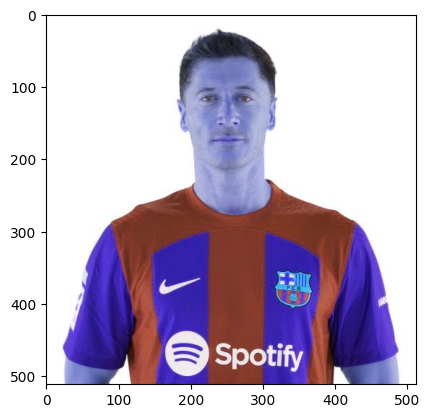

In [9]:
img = cv2.imread('./test_images/robert.jpg')
plt.imshow(img);

In [10]:
img.shape

(512, 512, 3)

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(512, 512)

### haarcascade for face and eye detction 

In [12]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[181,  66, 131, 131]])

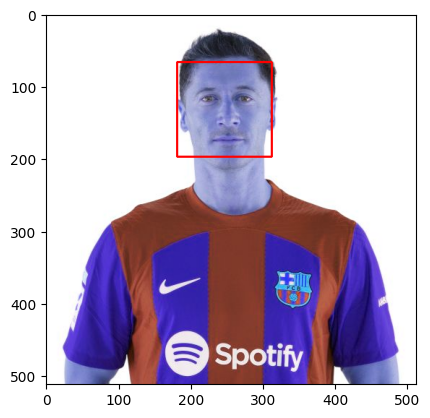

In [13]:
(x,y,w,h) = faces[0]
x,y,w,h
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

### Creating a funtion that shows eye and face scanned by haarcascade

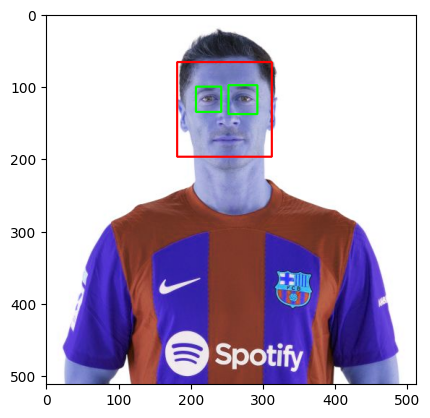

In [14]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

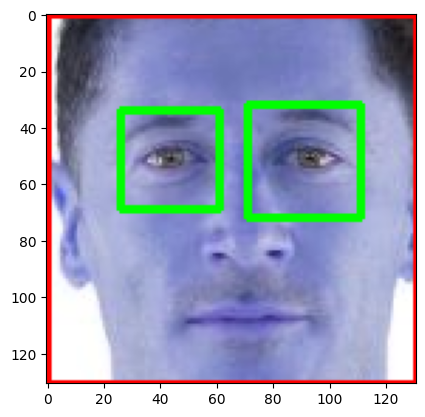

In [15]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [16]:
cropped_img = np.array(roi_color)
cropped_img.shape

(131, 131, 3)

### Data was collected using Google search and the Fatkun batch download extension. 



In [18]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

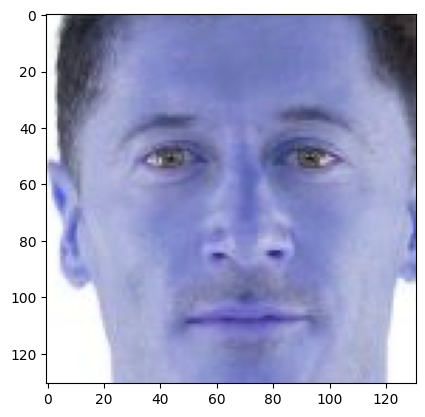

In [19]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/robert.jpg')
plt.imshow(cropped_image)


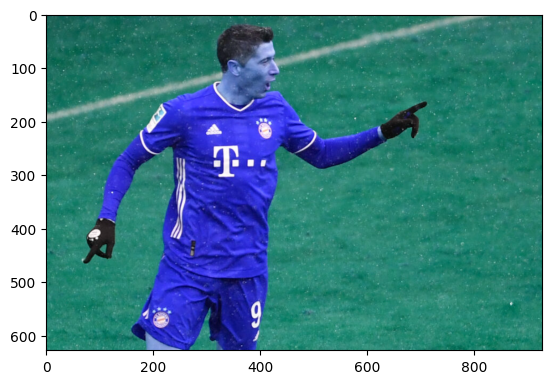

In [20]:

org_image_obstructed = cv2.imread('./test_images/robert_1.jpg')
plt.imshow(org_image_obstructed)

### Creating dir for cropped images 

In [21]:
path_to_data = "./Data/"
path_to_cr_data = "./Data/cropped/"

In [22]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [23]:
img_dirs

['./Data/cropped',
 './Data/david_beckham',
 './Data/karim_benzema',
 './Data/mohammed_salah',
 './Data/robert_lewndoswiki',
 './Data/ronaldo_cristiano']

In [27]:

if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

###  Getting all the cropped images in the dir they belong to.

In [28]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./Data/cropped/david_beckham
Generating cropped images in folder:  ./Data/cropped/karim_benzema
Generating cropped images in folder:  ./Data/cropped/mohammed_salah
Generating cropped images in folder:  ./Data/cropped/robert_lewndoswiki
Generating cropped images in folder:  ./Data/cropped/ronaldo_cristiano


### Converting images to Array format 

In [32]:

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

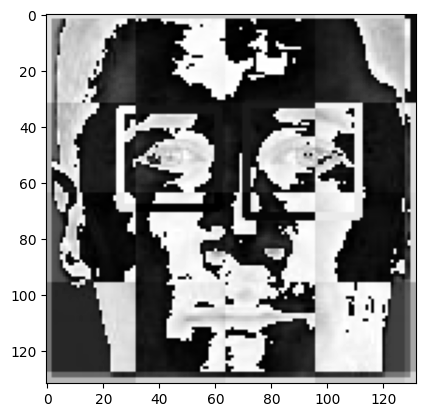

In [33]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [34]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'david_beckham': ['./Data/cropped/david_beckham\\david_beckham10.png',
  './Data/cropped/david_beckham\\david_beckham103.png',
  './Data/cropped/david_beckham\\david_beckham104.png',
  './Data/cropped/david_beckham\\david_beckham105.png',
  './Data/cropped/david_beckham\\david_beckham106.png',
  './Data/cropped/david_beckham\\david_beckham107.png',
  './Data/cropped/david_beckham\\david_beckham109.png',
  './Data/cropped/david_beckham\\david_beckham11.png',
  './Data/cropped/david_beckham\\david_beckham110.png',
  './Data/cropped/david_beckham\\david_beckham111.png',
  './Data/cropped/david_beckham\\david_beckham114.png',
  './Data/cropped/david_beckham\\david_beckham115.png',
  './Data/cropped/david_beckham\\david_beckham116.png',
  './Data/cropped/david_beckham\\david_beckham117.png',
  './Data/cropped/david_beckham\\david_beckham120.png',
  './Data/cropped/david_beckham\\david_beckham121.png',
  './Data/cropped/david_beckham\\david_beckham122.png',
  './Data/cropped/david_beckham\\

In [35]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'david_beckham': 0,
 'karim_benzema': 1,
 'mohammed_salah': 2,
 'robert_lewndoswiki': 3,
 'ronaldo_cristiano': 4}

### Generating your data set X(array of images) being feature and Y(name of footballers) being targeted

In [36]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [37]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(662, 4096)

### Creating our model

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.849624060150376

In [39]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        37
           1       0.88      0.83      0.86        18
           2       0.87      0.87      0.87        15
           3       0.96      0.74      0.83        34
           4       0.84      0.90      0.87        29

    accuracy                           0.85       133
   macro avg       0.86      0.85      0.85       133
weighted avg       0.86      0.85      0.85       133



### hypertuning parameters of model.

In [43]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [44]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\Abhishek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Abhishek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Abhishek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Abhishek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecat

,model,best_score,best_params
0,svm,0.858185,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.678580,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.879030,{'logisticregression__C': 1}


In [45]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [46]:
best_estimators['svm'].score(X_test,y_test)

0.8872180451127819

In [47]:
best_estimators['random_forest'].score(X_test,y_test)

0.7593984962406015

In [48]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8947368421052632

## SVM showed best results so it was incasulated to a pickle file

In [49]:
best_clf = best_estimators['svm']

In [53]:
class_dict

{'david_beckham': 0,
 'karim_benzema': 1,
 'mohammed_salah': 2,
 'robert_lewndoswiki': 3,
 'ronaldo_cristiano': 4}

In [54]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [55]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))